<a href="https://colab.research.google.com/github/emanuellela/social-graph/blob/main/Trabalho_1_APA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problematização



# Instalação dos pacotes

In [ ]:
#Instalação dos pacotes
!pip install networkx matplotlib pandas

#Importação dos pacotes (pacotes base não precisam ser instalados)
import heapq
import seaborn as sns
import numpy as np
import json
from datetime import datetime
import networkx as nx
import matplotlib.pyplot as plt

#CARGA DOS DADOS
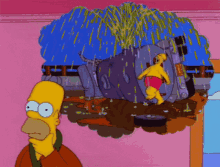

In [ ]:
dados = {
    "usuarios": [
        {"id": 1, "nome": "Alice"},
        {"id": 2, "nome": "Bob"},
        {"id": 3, "nome": "Charlie"},
        {"id": 4, "nome": "Diana"},
        {"id": 5, "nome": "Eva"},
        {"id": 6, "nome": "Frank"},
        {"id": 7, "nome": "Grace"}
    ],
    "amizades": [
        {"usuario1_id": 1, "usuario2_id": 2, "data_inicio": "2020-01-15"},
        {"usuario1_id": 1, "usuario2_id": 3, "data_inicio": "2022-03-20"},
        {"usuario1_id": 1, "usuario2_id": 4, "data_inicio": "2023-05-10"},
        {"usuario1_id": 2, "usuario2_id": 3, "data_inicio": "2021-07-05"},
        {"usuario1_id": 2, "usuario2_id": 5, "data_inicio": "2022-11-30"},
        {"usuario1_id": 3, "usuario2_id": 4, "data_inicio": "2023-01-22"},
        {"usuario1_id": 4, "usuario2_id": 5, "data_inicio": "2022-09-18"},
        {"usuario1_id": 5, "usuario2_id": 6, "data_inicio": "2023-04-07"},
        {"usuario1_id": 6, "usuario2_id": 7, "data_inicio": "2023-06-14"}
    ],
    "mensagens": [
        {"remetente_id": 1, "destinatario_id": 2, "data": "2023-07-01", "conteudo": "Oi Bob, como vai?"},
        {"remetente_id": 2, "destinatario_id": 1, "data": "2023-07-01", "conteudo": "Oi Alice, tudo bem!"},
        {"remetente_id": 1, "destinatario_id": 2, "data": "2023-07-02", "conteudo": "Que bom! Vamos marcar algo?"},
        {"remetente_id": 2, "destinatario_id": 1, "data": "2023-07-02", "conteudo": "Claro, que tal sábado?"},
        {"remetente_id": 1, "destinatario_id": 2, "data": "2023-07-03", "conteudo": "Perfeito! Onde?"},
        {"remetente_id": 2, "destinatario_id": 1, "data": "2023-07-03", "conteudo": "Que tal aquele café novo?"},
        {"remetente_id": 1, "destinatario_id": 3, "data": "2023-07-04", "conteudo": "E aí, Charlie?"},
        {"remetente_id": 3, "destinatario_id": 1, "data": "2023-07-04", "conteudo": "Oi Alice, tudo certo?"},
        {"remetente_id": 1, "destinatario_id": 4, "data": "2023-07-05", "conteudo": "Diana, como estão as coisas?"},
        {"remetente_id": 4, "destinatario_id": 1, "data": "2023-07-05", "conteudo": "Oi Alice, tudo tranquilo por aqui!"},
        {"remetente_id": 2, "destinatario_id": 3, "data": "2023-07-06", "conteudo": "Charlie, vamos jogar hoje?"},
        {"remetente_id": 3, "destinatario_id": 2, "data": "2023-07-06", "conteudo": "Claro, Bob! Que horas?"},
        {"remetente_id": 2, "destinatario_id": 3, "data": "2023-07-06", "conteudo": "Às 20h está bom?"},
        {"remetente_id": 3, "destinatario_id": 2, "data": "2023-07-06", "conteudo": "Perfeito, até lá!"},
        {"remetente_id": 2, "destinatario_id": 5, "data": "2023-07-07", "conteudo": "Oi Eva, como vai?"},
        {"remetente_id": 5, "destinatario_id": 2, "data": "2023-07-07", "conteudo": "Oi Bob, tudo bem por aqui!"},
        {"remetente_id": 3, "destinatario_id": 4, "data": "2023-07-08", "conteudo": "Diana, preciso de uma ajuda."},
        {"remetente_id": 4, "destinatario_id": 3, "data": "2023-07-08", "conteudo": "Claro, Charlie. O que houve?"},
        {"remetente_id": 3, "destinatario_id": 4, "data": "2023-07-08", "conteudo": "Pode me emprestar aquele livro?"},
        {"remetente_id": 4, "destinatario_id": 3, "data": "2023-07-08", "conteudo": "Sem problemas, passo aí mais tarde."},
        {"remetente_id": 4, "destinatario_id": 5, "data": "2023-07-09", "conteudo": "Eva, vamos ao cinema?"},
        {"remetente_id": 5, "destinatario_id": 4, "data": "2023-07-09", "conteudo": "Boa ideia, Diana! Qual filme?"},
        {"remetente_id": 4, "destinatario_id": 5, "data": "2023-07-09", "conteudo": "Que tal o novo de ação?"},
        {"remetente_id": 5, "destinatario_id": 4, "data": "2023-07-09", "conteudo": "Perfeito! Nos vemos lá."},
        {"remetente_id": 5, "destinatario_id": 6, "data": "2023-07-10", "conteudo": "Frank, como foi o trabalho?"},
        {"remetente_id": 6, "destinatario_id": 5, "data": "2023-07-10", "conteudo": "Oi Eva, foi bem puxado hoje."},
        {"remetente_id": 6, "destinatario_id": 7, "data": "2023-07-11", "conteudo": "Grace, vamos almoçar amanhã?"},
        {"remetente_id": 7, "destinatario_id": 6, "data": "2023-07-11", "conteudo": "Claro, Frank! Onde?"},
        {"remetente_id": 6, "destinatario_id": 7, "data": "2023-07-11", "conteudo": "No restaurante novo do centro?"},
        {"remetente_id": 7, "destinatario_id": 6, "data": "2023-07-11", "conteudo": "Ótimo, nos encontramos lá!"}
    ]
}

#CRIAÇÃO E VISUALIZAÇÃO DO PLOT

Arestas com seus pesos e detalhes:
Alice - Bob:
  Peso: 0.85
  Quantidade de Mensagens: 6
  Tempo de Amizade (dias): 1753
  Amigos em Comum: 1
------------------------------
Alice - Charlie:
  Peso: 0.60
  Quantidade de Mensagens: 2
  Tempo de Amizade (dias): 958
  Amigos em Comum: 2
------------------------------
Alice - Diana:
  Peso: 0.38
  Quantidade de Mensagens: 2
  Tempo de Amizade (dias): 542
  Amigos em Comum: 1
------------------------------
Bob - Charlie:
  Peso: 0.62
  Quantidade de Mensagens: 4
  Tempo de Amizade (dias): 1216
  Amigos em Comum: 1
------------------------------
Bob - Eva:
  Peso: 0.25
  Quantidade de Mensagens: 2
  Tempo de Amizade (dias): 703
  Amigos em Comum: 0
------------------------------
Charlie - Diana:
  Peso: 0.53
  Quantidade de Mensagens: 4
  Tempo de Amizade (dias): 650
  Amigos em Comum: 1
------------------------------
Diana - Eva:
  Peso: 0.40
  Quantidade de Mensagens: 4
  Tempo de Amizade (dias): 776
  Amigos em Comum: 0
------------------

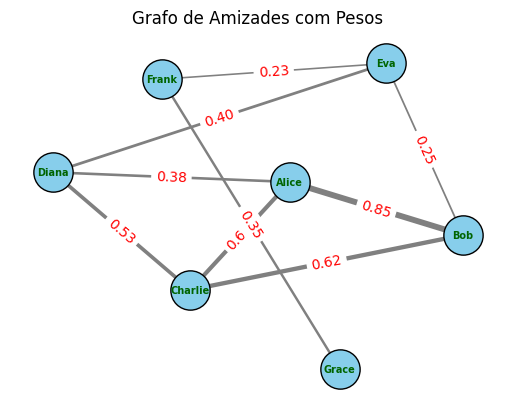

In [ ]:
#função para calcular a duração da amizade em dias
def calcular_duracao_em_dias(data_inicio):
    data_inicio = datetime.strptime(data_inicio, "%Y-%m-%d")
    hoje = datetime.now()
    delta = hoje - data_inicio
    return delta.days

#função para gerar relatório com métricas
def gerar_relatorio_com_metricas(dados):
    relatorio = {}

    #inicializa o relatório com cada usuário
    for usuario in dados['usuarios']:
        user_id = usuario['id']
        relatorio[user_id] = {
            "nome": usuario['nome'],
            "amigos": set(),
            "mensagens_enviadas": {},
            "tempo_amizade_dias": {},
            "amigos_em_comum": {}
        }

    #popula a lista de amigos e tempo de amizade
    for amizade in dados['amizades']:
        usuario1_id = amizade['usuario1_id']
        usuario2_id = amizade['usuario2_id']
        data_inicio = amizade['data_inicio']

        #adiciona amigos
        relatorio[usuario1_id]["amigos"].add(usuario2_id)
        relatorio[usuario2_id]["amigos"].add(usuario1_id)

        #calcula a duração da amizade em dias
        duracao = calcular_duracao_em_dias(data_inicio)
        relatorio[usuario1_id]["tempo_amizade_dias"][usuario2_id] = duracao
        relatorio[usuario2_id]["tempo_amizade_dias"][usuario1_id] = duracao

    #conta as mensagens trocadas entre cada par de usuários
    mensagens_trocadas = {}
    for mensagem in dados['mensagens']:
        remetente_id = mensagem['remetente_id']
        destinatario_id = mensagem['destinatario_id']
        par = tuple(sorted([remetente_id, destinatario_id]))
        if par not in mensagens_trocadas:
            mensagens_trocadas[par] = 0
        mensagens_trocadas[par] += 1

    #adiciona as informações de mensagens ao relatório
    for par, quantidade in mensagens_trocadas.items():
        usuario1_id, usuario2_id = par
        if usuario1_id in relatorio:
            if usuario2_id not in relatorio[usuario1_id]["mensagens_enviadas"]:
                relatorio[usuario1_id]["mensagens_enviadas"][usuario2_id] = {
                    "nome": relatorio[usuario2_id]["nome"],
                    "quantidade": 0
                }
            relatorio[usuario1_id]["mensagens_enviadas"][usuario2_id]["quantidade"] += quantidade
        if usuario2_id in relatorio:
            if usuario1_id not in relatorio[usuario2_id]["mensagens_enviadas"]:
                relatorio[usuario2_id]["mensagens_enviadas"][usuario1_id] = {
                    "nome": relatorio[usuario1_id]["nome"],
                    "quantidade": 0
                }
            relatorio[usuario2_id]["mensagens_enviadas"][usuario1_id]["quantidade"] += quantidade

    #calcula amigos em comum
    for user_id, info in relatorio.items():
        relatorio[user_id]["amigos_em_comum"] = {}
        for amigo_id in info["amigos"]:
            amigos_do_amigo = relatorio[amigo_id]["amigos"]
            comuns = info["amigos"].intersection(amigos_do_amigo)
            comuns.discard(amigo_id)  # Remove o próprio amigo
            relatorio[user_id]["amigos_em_comum"][amigo_id] = len(comuns)

    return relatorio

#função para construir o grafo com pesos
def construir_grafo_com_pesos(dados, relatorio):
    G = nx.Graph()

    #adiciona os nós
    for usuario in dados['usuarios']:
        G.add_node(usuario['id'], nome=usuario['nome'])

    #adiciona as arestas com pesos
    for amizade in dados['amizades']:
        usuario1_id = amizade['usuario1_id']
        usuario2_id = amizade['usuario2_id']

        #quantidade de mensagens trocadas (bidirecional)
        par = tuple(sorted([usuario1_id, usuario2_id]))
        quantidade_mensagens = 0
        for mensagem in dados['mensagens']:
            if (mensagem['remetente_id'], mensagem['destinatario_id']) == par or \
               (mensagem['remetente_id'], mensagem['destinatario_id']) == par[::-1]:
                quantidade_mensagens += 1

        #tempo de amizade em dias
        tempo_amizade = relatorio[usuario1_id]["tempo_amizade_dias"][usuario2_id]

        #amigos em comum
        amigos_em_comum = relatorio[usuario1_id]["amigos_em_comum"][usuario2_id]

        #normalização dos fatores
        #encontra os máximos para normalização
        #coleta todos os valores para cada fator
        todas_quant_mensagens = [0]
        todas_tempo_amizade = [0]
        todas_amigos_em_comum = [0]
        for amizade_iter in dados['amizades']:
            u1 = amizade_iter['usuario1_id']
            u2 = amizade_iter['usuario2_id']
            par_iter = tuple(sorted([u1, u2]))
            msg = 0
            for msg_iter in dados['mensagens']:
                if (msg_iter['remetente_id'], msg_iter['destinatario_id']) == par_iter or \
                   (msg_iter['remetente_id'], msg_iter['destinatario_id']) == par_iter[::-1]:
                    msg += 1
            todas_quant_mensagens.append(msg)
            todas_tempo_amizade.append(relatorio[u1]["tempo_amizade_dias"][u2])
            todas_amigos_em_comum.append(relatorio[u1]["amigos_em_comum"][u2])

        max_mensagens = max(todas_quant_mensagens) or 1
        max_tempo = max(todas_tempo_amizade) or 1
        max_comum = max(todas_amigos_em_comum) or 1

        #normaliza os fatores (valores entre 0 e 1)
        norm_mensagens = quantidade_mensagens / max_mensagens
        norm_tempo = tempo_amizade / max_tempo
        norm_comum = amigos_em_comum / max_comum

        #define pesos para cada fator
        peso_mensagens = 0.4
        peso_tempo = 0.3
        peso_comum = 0.3

        #calcula o peso final
        peso_final = (norm_mensagens * peso_mensagens) + (norm_tempo * peso_tempo) + (norm_comum * peso_comum)

        #adiciona a aresta com o peso
        G.add_edge(usuario1_id, usuario2_id, weight=peso_final, quantidade_mensagens=quantidade_mensagens,
                   tempo_amizade_dias=tempo_amizade, amigos_em_comum=amigos_em_comum)

    return G

#gerar o relatório com métricas
relatorio = gerar_relatorio_com_metricas(dados)

#construir o grafo com pesos
grafo = construir_grafo_com_pesos(dados, relatorio)

#exibir as arestas com seus pesos e detalhes
print("Arestas com seus pesos e detalhes:")
for u, v, attrs in grafo.edges(data=True):
    print(f"{relatorio[u]['nome']} - {relatorio[v]['nome']}:")
    print(f"  Peso: {attrs['weight']:.2f}")
    print(f"  Quantidade de Mensagens: {attrs['quantidade_mensagens']}")
    print(f"  Tempo de Amizade (dias): {attrs['tempo_amizade_dias']}")
    print(f"  Amigos em Comum: {attrs['amigos_em_comum']}")
    print("-" * 30)

def visualizar_grafo(grafo):
    #configuração do layout e personalização do grafo
    pos = nx.spring_layout(grafo, seed=42, k=1.5)  #aumentar o valor de k para afastar os nós

    #personalização dos nós
    nx.draw_networkx_nodes(
        grafo,
        pos,
        node_size=800,
        node_color='skyblue',  #cor dos nós
        edgecolors='black'     #contorno dos nós
    )

    #personalização das arestas com largura proporcional ao peso
    weights = [attrs['weight'] for _, _, attrs in grafo.edges(data=True)]
    nx.draw_networkx_edges(
        grafo,
        pos,
        width=[w * 5 for w in weights],  #largura das arestas com peso
        edge_color='gray'       #cor das arestas
    )

    #desenha os rótulos dos nós
    labels = {node: data['nome'] for node, data in grafo.nodes(data=True)}
    nx.draw_networkx_labels(
        grafo,
        pos,
        labels,
        font_size=7,
        font_color='darkgreen',  #cor dos rótulos dos nós
        font_weight='bold'
    )

    #desenha os rótulos das arestas (peso)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in grafo.edges(data=True)}
    nx.draw_networkx_edge_labels(
        grafo,
        pos,
        edge_labels=edge_labels,
        font_color='red'  #cor dos rótulos das arestas
    )

    #ajustes finais de visualização
    plt.axis('off')  #desativa os eixos para uma aparência mais limpa
    plt.title("Grafo de Amizades com Pesos")
    plt.show()

#visualizar o grafo com as novas personalizações
visualizar_grafo(grafo)


#ANÁLISES DE AMIGOS EM COMUM

Análise de Amigos em Comum. Dado um determinado usuário, identifique (pelo menos):

Lista de amigos diretos.

Número de amigos em comum com cada um de seus amigos.

In [ ]:
#lista de amigos diretos.
def listar_amigos_diretos_e_comum(usuario_id, relatorio):
    info_usuario = relatorio[usuario_id]
    amigos_diretos = info_usuario["amigos"]

    # lista para armazenar informações dos amigos e amigos em comum
    amigos_info = []

    for amigo_id in amigos_diretos:
        amigos_em_comum = info_usuario["amigos_em_comum"][amigo_id]
        amigo_nome = relatorio[amigo_id]["nome"]
        amigos_info.append({
            "amigo_id": amigo_id,
            "nome": amigo_nome,
            "amigos_em_comum": amigos_em_comum
        })

    return amigos_info

# exemplo de uso para o usuário com ID 1 (Alice)
usuario_id = 3
amigos_info = listar_amigos_diretos_e_comum(usuario_id, relatorio)
print(f"Amigos diretos e número de amigos em comum para o usuário {relatorio[usuario_id]['nome']}:")

for amigo in amigos_info:
    print(f"{amigo['nome']}: {amigo['amigos_em_comum']} amigos em comum")

Amigos diretos e número de amigos em comum para o usuário Charlie:
Alice: 2 amigos em comum
Bob: 1 amigos em comum
Diana: 1 amigos em comum


#Gráfico - Análise de amigos em Comum - Extra (Mapa de calor)

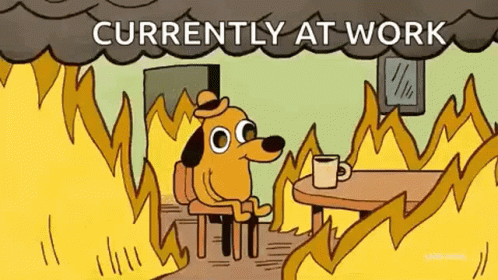

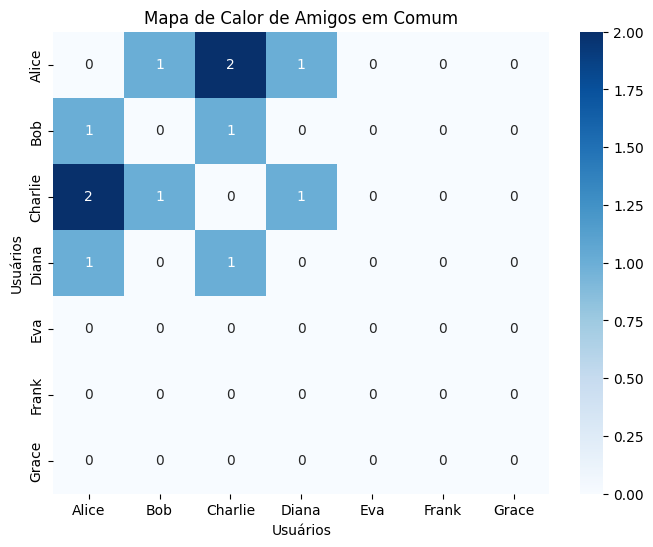

In [ ]:
#função para gerar o gráfico de rede de amigos com amigos em comum
def plot_rede_amigos_em_comum(grafo, relatorio):
    pos = nx.spring_layout(grafo, seed=42)  # Define a posição dos nós

    # Extrai o número de amigos em comum para cada aresta
    weights = [attrs['amigos_em_comum'] for _, _, attrs in grafo.edges(data=True)]

    # Desenha os nós
    nx.draw_networkx_nodes(grafo, pos, node_size=700, node_color='lightblue')

    # Desenha as arestas com largura proporcional ao número de amigos em comum
    nx.draw_networkx_edges(grafo, pos, width=[w * 2 for w in weights], edge_color='gray')

    # Desenha os rótulos dos nós
    labels = {node: data['nome'] for node, data in grafo.nodes(data=True)}
    nx.draw_networkx_labels(grafo, pos, labels, font_size=12)

    # Desenha os rótulos das arestas (amigos em comum)
    edge_labels = { (u, v): f"{d['amigos_em_comum']}" for u, v, d in grafo.edges(data=True) }
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=edge_labels, font_color='red')

    plt.title("Rede de Amizades com Contagem de Amigos em Comum")
    plt.axis('off')
    plt.show()

# Função para gerar o mapa de calor dos amigos em comum
def plot_mapa_calor_amigos_em_comum(relatorio):
    # Cria uma matriz para armazenar a contagem de amigos em comum
    usuarios_ids = sorted(relatorio.keys())
    n = len(usuarios_ids)
    matriz_amigos_comum = np.zeros((n, n))

    # Preenche a matriz com os dados de amigos em comum
    for i, usuario1_id in enumerate(usuarios_ids):
        for j, usuario2_id in enumerate(usuarios_ids):
            if usuario1_id != usuario2_id:
                amigos_comum = relatorio[usuario1_id]["amigos_em_comum"].get(usuario2_id, 0)
                matriz_amigos_comum[i, j] = amigos_comum

    # Mapa de calor com seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_amigos_comum, annot=True, cmap="Blues", fmt=".0f",
                xticklabels=[relatorio[uid]['nome'] for uid in usuarios_ids],
                yticklabels=[relatorio[uid]['nome'] for uid in usuarios_ids])
    plt.title("Mapa de Calor de Amigos em Comum")
    plt.xlabel("Usuários")
    plt.ylabel("Usuários")
    plt.show()

# Plota o gráfico de rede e o mapa de calor
plot_mapa_calor_amigos_em_comum(relatorio)


#RECOMENDAÇÃO DE AMIZADES

Recomendação de Amizades. Sugira amizades para um usuário (pelo menos) com base em:

Amigos em Comum: Usuários que não são amigos diretos, mas têm amigos em comum.

Afinidade: Potencial afinidade entre usuários com base em informações disponíveis no dataset.


In [ ]:
# função para sugerir amizades
def sugerir_amizades(usuario_id, dados, relatorio):
    sugestoes = {}

    #identifica os amigos do usuário
    amigos_do_usuario = relatorio[usuario_id]["amigos"]

    #itera sobre os amigos do usuário para encontrar amigos em comum
    for amigo_id in amigos_do_usuario:
        amigos_do_amigo = relatorio[amigo_id]["amigos"]

        #encontra usuários que não são amigos diretos mas possuem amigos em comum
        for potencial_amigo in amigos_do_amigo:
            if potencial_amigo != usuario_id and potencial_amigo not in amigos_do_usuario:
                if potencial_amigo not in sugestoes:
                    sugestoes[potencial_amigo] = {
                        "nome": relatorio[potencial_amigo]["nome"],
                        "amigos_em_comum": 0,
                        "afinidade": 0
                    }

                #conta o número de amigos em comum
                sugestoes[potencial_amigo]["amigos_em_comum"] += 1

                #incrementa a afinidade com base nas mensagens e no tempo de amizade
                mensagens_comuns = relatorio[usuario_id]["mensagens_enviadas"].get(amigo_id, 0)
                tempo_amizade = relatorio[usuario_id]["tempo_amizade_dias"].get(amigo_id, 0)
                sugestoes[potencial_amigo]["afinidade"] += (mensagens_comuns * 0.5 + tempo_amizade * 0.2)

    #ordena as sugestões por afinidade e número de amigos em comum
    recomendacoes = heapq.nlargest(5, sugestoes.items(), key=lambda x: (x[1]["amigos_em_comum"], x[1]["afinidade"]))

    #exibe sugestões formatadas
    print(f"Sugestões de amizades para o usuário {relatorio[usuario_id]['nome']}:")
    for _, sugestao in recomendacoes:
        print(f"- {sugestao['nome']} (Amigos em Comum: {sugestao['amigos_em_comum']}, Afinidade: {sugestao['afinidade']:.2f})")

#executa as funções
relatorio = gerar_relatorio(dados)
sugerir_amizades(5, dados, relatorio)


Sugestões de amizades para o usuário Eva:
- Alice (Amigos em Comum: 2, Afinidade: 297.30)
- Charlie (Amigos em Comum: 2, Afinidade: 297.30)
- Grace (Amigos em Comum: 1, Afinidade: 115.50)
